In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Data Understanding

In [2]:
data = pd.read_csv('bitcoinfinal+(4).csv', header=None)
data.columns = ['Month','Value']
#data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data = data.set_index('Month')
data.head(12)

,Value
Month,
0,217.4
1,255.7
2,244.3
3,236.1
4,228.7
5,262.9
6,284.5
7,231.4
8,236.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 1 columns):
Value    32 non-null float64
dtypes: float64(1)
memory usage: 512.0 bytes


### Time Series Analysis Plot

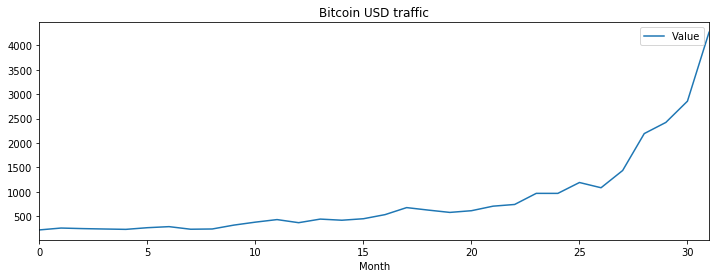

In [4]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Bitcoin USD traffic')
plt.show(block=False)

### Outlier Analysis

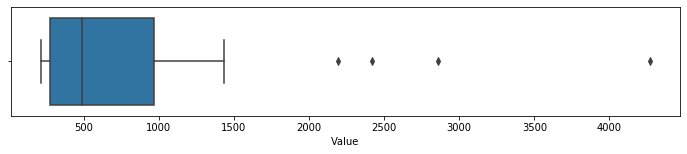

In [5]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Value'],whis=1.5)

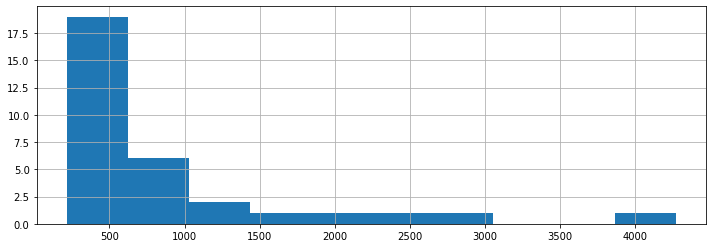

In [6]:
fig = data['Value'].hist(figsize = (12,4))

### Train-Test Split

In [7]:
train_len = 29
train = data[0:train_len] # first 29 months as training set
test = data[train_len:] # last 3 months as out-of-time test set

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 29 to 31
Data columns (total 1 columns):
Value    3 non-null float64
dtypes: float64(1)
memory usage: 48.0 bytes


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 1 columns):
Value    29 non-null float64
dtypes: float64(1)
memory usage: 464.0 bytes


### Naive Method

In [10]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Value'][train_len-1]

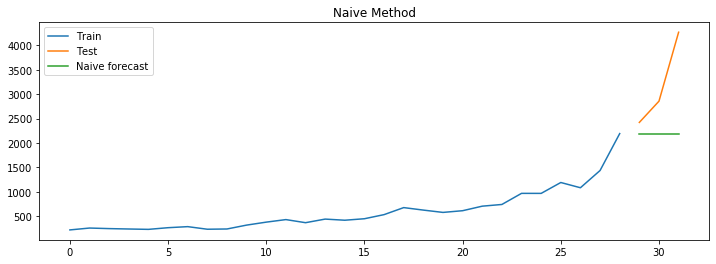

In [11]:
# train-test-forecast plot
plt.figure(figsize=(12,4))
plt.plot(train['Value'], label='Train')
plt.plot(test['Value'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Value'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Value']-y_hat_naive['naive_forecast'])/test['Value'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.9,27.12


### Simple average method

In [13]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Value'].mean()

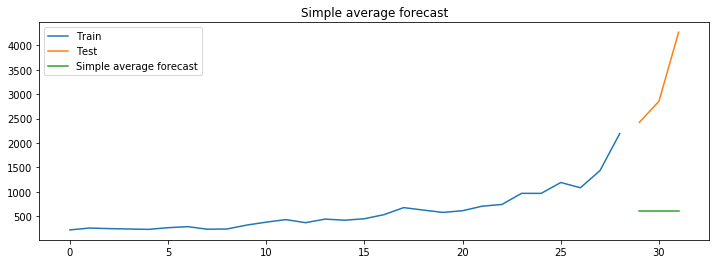

In [14]:
# train-test-forecast plot
plt.figure(figsize=(12,4))
plt.plot(train['Value'], label='Train')
plt.plot(test['Value'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple average forecast')
plt.show()

In [15]:
rmse = np.sqrt(mean_squared_error(test['Value'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Value']-y_hat_avg['avg_forecast'])/test['Value'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19


In [16]:
y_hat_naive['naive_forecast'].head()

Month
29    2191.8
30    2191.8
31    2191.8
Name: naive_forecast, dtype: float64

In [17]:
y_hat_avg['avg_forecast'].head()

Month
29    595.751724
30    595.751724
31    595.751724
Name: avg_forecast, dtype: float64

### Simple moving average method - 12 months window

In [18]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Value'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

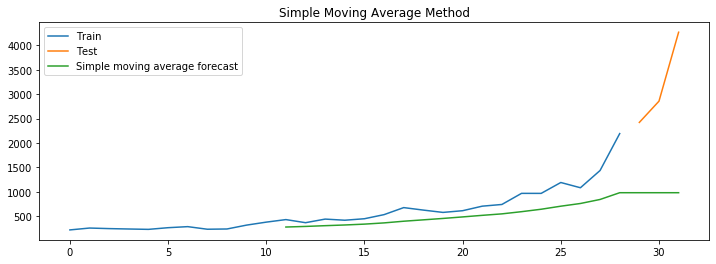

In [19]:
# train-test-forecast plot
plt.figure(figsize=(12,4))
plt.plot(train['Value'], label='Train')
plt.plot(test['Value'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [20]:
rmse = np.sqrt(mean_squared_error(test['Value'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Value']-y_hat_sma['sma_forecast'][train_len:])/test['Value'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42


### Simple moving average method - 6 months window

In [21]:
y_hat_sma6 = data.copy()
ma_window = 6
y_hat_sma6['sma_forecast_6'] = data['Value'].rolling(ma_window).mean()
y_hat_sma6['sma_forecast_6'][train_len:] = y_hat_sma6['sma_forecast_6'][train_len-1]

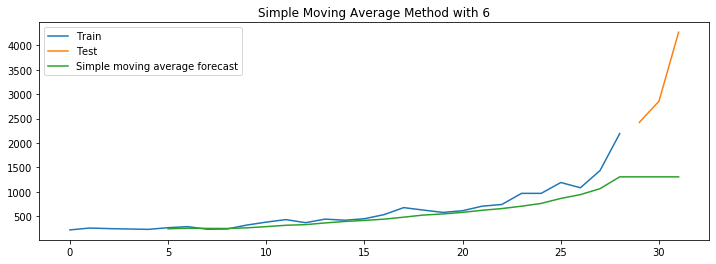

In [22]:
# train-test-forecast plot
plt.figure(figsize=(12,4))
plt.plot(train['Value'], label='Train')
plt.plot(test['Value'], label='Test')
plt.plot(y_hat_sma6['sma_forecast_6'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method with 6')
plt.show()

In [23]:
rmse = np.sqrt(mean_squared_error(test['Value'], y_hat_sma6['sma_forecast_6'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Value']-y_hat_sma6['sma_forecast_6'][train_len:])/test['Value'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast with 6'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast with 6,2035.79,56.61


### Simple moving average  - 3 months window

In [24]:
y_hat_sma3 = data.copy()
ma_window = 3
y_hat_sma3['sma_forecast_3'] = data['Value'].rolling(ma_window).mean()
y_hat_sma3['sma_forecast_3'][train_len:] = y_hat_sma3['sma_forecast_3'][train_len-1]

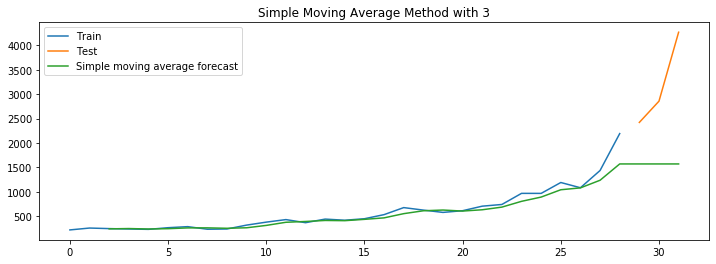

In [25]:
# train-test-forecast plot
plt.figure(figsize=(12,4))
plt.plot(train['Value'], label='Train')
plt.plot(test['Value'], label='Test')
plt.plot(y_hat_sma3['sma_forecast_3'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method with 3')
plt.show()

In [26]:
rmse = np.sqrt(mean_squared_error(test['Value'], y_hat_sma3['sma_forecast_3'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Value']-y_hat_sma3['sma_forecast_3'][train_len:])/test['Value'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast with 3'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast with 6,2035.79,56.61
0,Simple moving average forecast with 3,1794.92,47.81


### Simple exponential smoothing method

In [27]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Value'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(3)

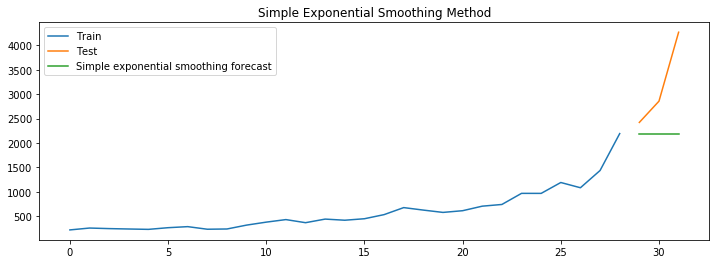

In [28]:
# train-test-forecast plot
plt.figure(figsize=(12,4))
plt.plot(train['Value'], label='Train')
plt.plot(test['Value'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [29]:
y_hat_ses['ses_forecast'].head()

Month
29    2191.8
30    2191.8
31    2191.8
Name: ses_forecast, dtype: float64

In [30]:
rmse = np.sqrt(mean_squared_error(test['Value'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Value']-y_hat_ses['ses_forecast'])/test['Value'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast with 6,2035.79,56.61
0,Simple moving average forecast with 3,1794.92,47.81
0,Simple exponential smoothing forecast,1265.90,27.12


### Holt\'s Exponential Smoothing Method - Holt's method with trend

In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Value']),seasonal_periods=12,trend='additive',seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 1.0, 'smoothing_slope': 0.4216689816104592, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 203.68630825041842, 'initial_slope': 13.712946700068688, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


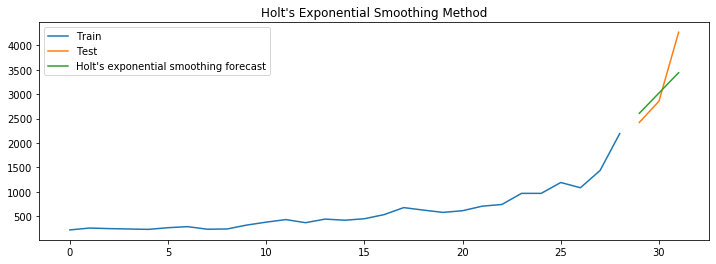

In [32]:
# train, test, forecast plot
plt.figure(figsize=(12,4))
plt.plot( train['Value'], label='Train')
plt.plot(test['Value'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [33]:
rmse = np.sqrt(mean_squared_error(test['Value'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Value']-y_hat_holt['holt_forecast'])/test['Value'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast with 6,2035.79,56.61
0,Simple moving average forecast with 3,1794.92,47.81
0,Simple exponential smoothing forecast,1265.90,27.12
0,Holt's exponential smoothing method,500.10,11.01


### Holt Winters' additive method with trend and seasonality

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Value']) ,seasonal_periods=3 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.9999999966296118, 'smoothing_slope': 0.4158840347660917, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 559.4835559832011, 'initial_slope': 1.141586351102969, 'initial_seasons': array([-340.14176737, -301.86534664, -319.2290442 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


c:\Users\s.ag.chakraborty\AppData\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


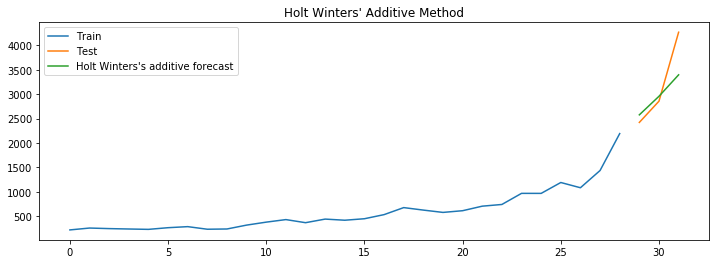

In [35]:
# plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Value'], label='Train')
plt.plot(test['Value'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [36]:
rmse = np.sqrt(mean_squared_error(test['Value'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Value']-y_hat_hwa['hw_forecast'])/test['Value'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast with 6,2035.79,56.61
0,Simple moving average forecast with 3,1794.92,47.81
0,Simple exponential smoothing forecast,1265.90,27.12
0,Holt's exponential smoothing method,500.10,11.01
0,Holt Winters' additive method,515.11,10.12


### Holt Winter's multiplicative method with trend and seasonality

In [37]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Value']) ,seasonal_periods=3 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 1.0, 'smoothing_slope': 0.3159217878524853, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 559.5299998376623, 'initial_slope': 1.1444444468674946, 'initial_seasons': array([0.40269202, 0.46254117, 0.41789625]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


c:\Users\s.ag.chakraborty\AppData\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


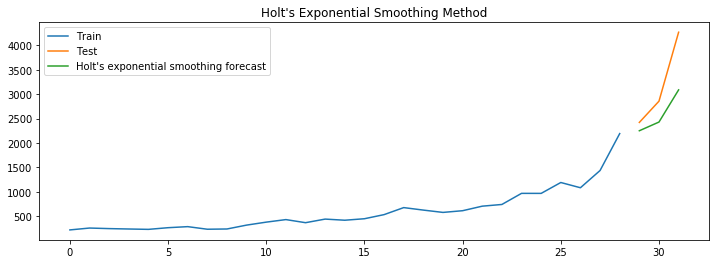

In [43]:
# plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Value'], label='Train')
plt.plot(test['Value'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [38]:
rmse = np.sqrt(mean_squared_error(test['Value'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Value']-y_hat_hwm['hw_forecast'])/test['Value'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast with 6,2035.79,56.61
0,Simple moving average forecast with 3,1794.92,47.81
0,Simple exponential smoothing forecast,1265.90,27.12
0,Holt's exponential smoothing method,500.10,11.01
0,Holt Winters' additive method,515.11,10.12
0,Holt Winters' multiplicative method,731.90,16.57


### Holt's method with trend with 3 seasons

In [39]:
model = ExponentialSmoothing(np.asarray(train['Value']) ,seasonal_periods=3 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 1.0, 'smoothing_slope': 0.4216689816104592, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 203.68630825041842, 'initial_slope': 13.712946700068688, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [41]:
rmse = np.sqrt(mean_squared_error(test['Value'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Value']-y_hat_holt['holt_forecast'])/test['Value'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast with 6,2035.79,56.61
0,Simple moving average forecast with 3,1794.92,47.81
0,Simple exponential smoothing forecast,1265.90,27.12
0,Holt's exponential smoothing method,500.10,11.01
0,Holt Winters' additive method,515.11,10.12
0,Holt Winters' multiplicative method,731.90,16.57
0,Holt's exponential smoothing method,500.10,11.01
